In [37]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import matplotlib.pyplot as plt
from scipy import linalg
from pathlib import Path
# from scipy.stats import binomtest, binom_gen

## helper functions

In [38]:
def printmatrix(mat, **kwargs):
    
    format_dict = {
        'float_kind': lambda x: f"{x:>10.3f}",
        'bool': lambda x: False if x == 0 else True,
        }
    formatter = kwargs.get("formatter", format_dict)
    linewidth = kwargs.get("linewidth", 110)
    with np.printoptions(formatter=formatter, linewidth=linewidth):
        print(mat)

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x000002C54D4C9B20>
2.718281828459045
-0.0
-2.718281828459045


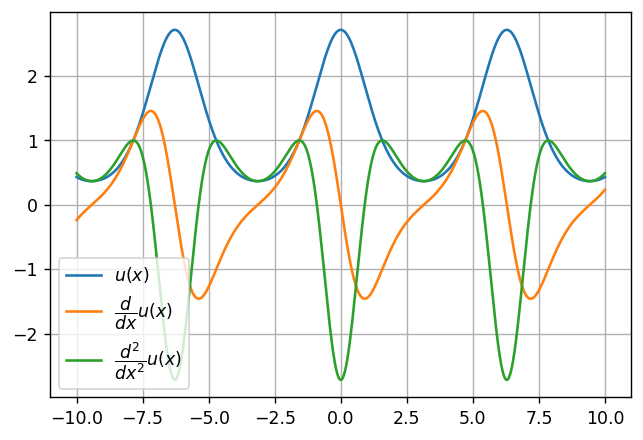

In [39]:
u = lambda x: np.exp(np.cos(x))

x = np.linspace(-10, 10, 1001, dtype=np.float64)
up = elementwise_grad(u)
upp = elementwise_grad(up)
print(up)
fig, ax = plt.subplots(dpi=125, figsize=(6,4))
ax.plot(x, u(x), label = "$u(x)$")
ax.plot(x, up(x), label = r"$\dfrac{d}{dx}u(x)$")
ax.plot(x, upp(x), label = r"$\dfrac{d^2}{dx^2}u(x)$")

ax.grid()
ax.legend()

for func in [u, up, upp]:
    print(func(0.))

# Exercise 2.a

Solve the PDE with Dirichlet BC (DBC):
$$\begin{align*}
\epsilon u'' + u(u' - 1) = 0, &\quad 0\leq t \leq 1 \\
    u(0) = \alpha, &\quad u(1) = \beta
\end{align*}$$
with $\alpha = -1$, $\beta = 1.5$, and $\epsilon = 0.1$

In [40]:
N = 10
a, b = 0, 1
h = (b - a) / N

# ts = np.arange(a, b+h, step=h)

def system(N):
    ones =  lambda n: np.ones(shape=(n,), dtype=np.float64)
    A = np.diag(ones(N-2), 1) + np.diag(ones(N-2), -1) + np.diag(-2*ones(N-1), 0)
    return A

def rhs2BV(b, BC):
    B = b
    alpha, beta = BC
    B[0] -= alpha
    B[-1] -= beta
    return B

print(F"{system(N) = }")
system(N)
print(F"{rhs2BV(np.zeros((N-1)), (-1, 1.5)) = }")
rhs2BV(np.zeros((N-1)), (-1, 1.5))


def solve2BV(N, BC, h):
    A = system(N)
    alpha, beta = BC
    f = np.ones((N-1))
    B = rhs2BV(f, (alpha/h**2, beta/h**2))
    return linalg.solve(A, B)

print(F"{solve2BV(10, (-1, 1.5), 1e-2) = }")

    

system(N) = array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])
rhs2BV(np.zeros((N-1)), (-1, 1.5)) = array([ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1.5])
solve2BV(10, (-1, 1.5), 1e-2) = array([-7.50450e+03, -5.00800e+03, -2.51050e+03, -1.20000e+01,
        2.48750e+03,  4.98800e+03,  7.48950e+03,  9.99200e+03,
        1.24955e+04])


In [41]:
from sympy import init_session, factorial, summation, symbols, diff, Function, O, latex
from IPython.display import display, Math
# from scipy.special import factorial
init_session()

IPython console for SymPy 1.13.3 (Python 3.13.2-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

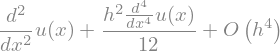

In [42]:
j, h, a = symbols("j h alpha")
u = Function("u")

def taylor(func, var, k, J):
    return sum( (J*h)**n / (factorial(n)) * diff(func(var), var, n) + O(h**(k+1)) for n in range(k+1))

u_m = taylor(u, x, 5, j-1)
u_p = taylor(u, x, 5, j+1)
u_0 = taylor(u, x, 5,  j )

res = (u_m - 2*u_0 + u_p) / h**2
def coeff(n):
    return ((j-1)**n - 2*j**n + (j+1)**n).simplify()

for n in range(6):
    display(Math(rf"\alpha_{n} =" + latex(coeff(n))))
display(res.subs(j, 0).simplify())
# sum(coeff(n) * h**n * diff(u(x), x, n) / factorial(n) for n in range(6)).subs(j, 1) / h**2

# Exericse 2.b)

## b) Solve equation using Newton's method

$$\begin{align*}
    \epsilon u'' + u(u' -1) = 0, &\quad 0\leq t \leq 1, \\
    u(0) = \alpha, &\quad u(1) = \beta, \\
    \alpha = -1, \quad \beta = 1.5, &\quad \epsilon = 0.1
\end{align*}$$

We are told that we may use 
$$
    u(x) \approx x - \bar x + w_0\tanh{\left(\frac{w_0(x-\bar x)}{2\epsilon}\right)}
$$
for our initial guess.

First we note that, rewriting as we have described in our assignemnt task 2a. a), we have that 
$$\begin{align*}
    \epsilon u'' + u(u' -1) &= 0 \\
    \Rightarrow \epsilon \frac{U_{j-1} - 2U_j + U_{j+1}}{h^2} + U_j\left(\frac{U_{j+1} - U_{j-1}}{2h} - 1\right) &= 0 \\
    \Rightarrow F_j(U) &= 0
\end{align*}$$

Then, we define the jacobian as
$$ 
    J_{ij}(U) = \frac{\partial}{\partial U_j} F_i(U)
$$

we then have the non-zero derivatives
$$\begin{align*}
    \frac{\partial}{\partial U_{i-1}}F_i(U) &= \epsilon\frac{1}{h^2} - \frac{U_i}{2h} \\
    \frac{\partial}{\partial U_{i}}F_i(U) &= -2\epsilon \frac{1}{h^2} + \frac{U_{i+1} - U_{i-1}}{2h} - 1\\
    \frac{\partial}{\partial U_{i+1}}F_i(U) &= \epsilon\frac{1}{h^2} + \frac{U_i}{2h}
\end{align*}$$
assuming we have a $4\times 4$ matrix, such that, $i, j \in \{0, 3\}$

We get the jacobian

$$\begin{align*}
    J &= \begin{pmatrix}
        1 & 0 & 0 & 0 \\ 
        \frac{\epsilon}{h^2} - \frac{U_1}{2h} & -\frac{2\epsilon}{h^2} + \frac{U_{2} - U_{0}}{2h} & \frac{\epsilon}{h^2} + \frac{U_1}{2h} & 0 \\
        0 & \frac{\epsilon}{h^2} - \frac{U_2}{2h} & -\frac{2\epsilon}{h^2} + \frac{U_3 - U_1}{2h} & \frac{\epsilon}{h^2} + \frac{U_2}{2h} \\
        0 & 0 & 0 & 1
    \end{pmatrix}
\end{align*}$$

epsilon = 1
Running loop   :     339/3,000
## Converged   : 1.000e-06 < tolerance

epsilon = 0.1
Running loop   :   2,070/3,000
## Converged   : 9.987e-07 < tolerance

epsilon = 0.01
Running loop   :     192/3,000
## Converged   : 9.739e-07 < tolerance

epsilon = 0.001
Running loop   :      32/3,000
## Converged   : 8.279e-07 < tolerance



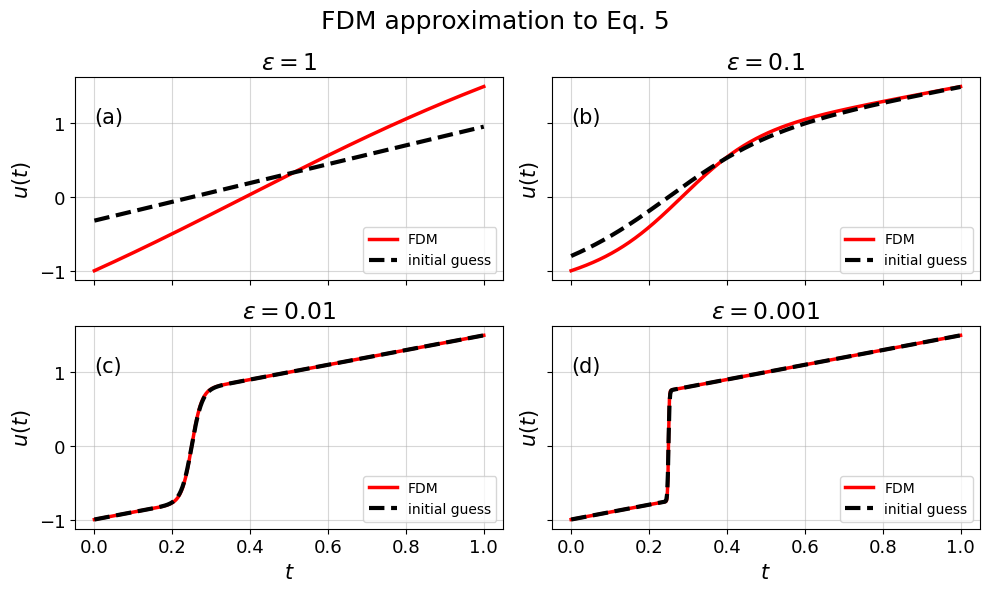

In [ ]:
a, b = 0, 1 # boundary points
alpha, beta = -1, 1.5 # boundary values
N = 500 # Number of grid points


# Define initial guess u(t, epsilon)
tbar = 0.5 * (a + b - alpha - beta)
w0 = 0.5 * (a - b + beta - alpha)
u_init = lambda t, eps: t - tbar + w0 * np.tanh(w0*(t - tbar) / (2*eps))


# Define t-array of equidistant points
ts = np.linspace(a, b, num=N, endpoint=True)
h = np.abs(ts[0] - ts[1]) # step between grid-points 

def jacobian(U, epsilon):
    """ Compute Jacobian for the equation
    epsilon * u'' + u * (u' - 1) = 0
    
    Paramters
    ---
    U : ndarray of size `(N,)`
    epsilon : float  
        The value of the `epsilon` parameter
    
    Returns
    ---
    J : ndarray of size `(N, N)`
        the jcaobian of the specific problem
    """
    # BC: u(a) = alpha, u(b) = beta
    h = (b - a) / N # step size
    
    # Initialized jacobian. First and last element in diagonal are set to 1, to avoid updating the boundary values, ensuring that BC hold.
    J = np.zeros(shape=(N,N))
    J[0,0] = 1
    J[-1, -1] = 1
    
    # The tri-diagonal is set
    for i in range(1, N-1):
        J[i, i-1] = epsilon/(h**2) - U[i]/(2*h) 
        J[i, i] = -2*epsilon/(h**2) + (U[i+1] - U[i-1] - 1) / (2*h)
        J[i, i+1] = epsilon/(h**2) + U[i]/(2*h)
    return J


def system(U, epsilon):
    """ Compute the residuals of the system
    
    Paramters
    ---
    U : ndarray of size `(N,)`
    epsilon : float  
        The value of the `epsilon` parameter
    
    Returns
    ---
    F : ndarray of size `(N,)`
        the residuals of the system
    """
    # initialize array
    F = np.zeros(shape=(N, ))
    
    # Ensure BC 
    F[0] = U[0] - alpha 
    F[-1] = U[-1] - beta
    
    # Everything else is determined according to the stencil approximations
    for i in range(1, N-1):
        upp = (U[i+1] - 2*U[i] + U[i-1]) / (h**2)
        up = (U[i+1] - U[i-1]) / (2*h)
        F[i] = epsilon*upp + U[i]*(up - 1)
    return F


def Newton(u0, epsilon, max_iter, tol=1e-6):
    """Use Newtons method for iterative root-finding of the system, `F(U) = 0`.
    
    Update `U^[k+1] = U^[k] + DeltaU`.  
    
    Compute `J^[k+1]` and `F^[k+1]` from `U^[k+1]`.  
    
    Solve `J @ DeltaU = -F`.
    
    Check if `||F^[k]|| / ||F^[0]|| < epsilon` (converged)
    
    Parameters
    ---
    u0 : ndarray of size `(N,)`  
        The initial guess
    epsilon : float  
        The value of the `epsilon` parameter  
    max_iter : int
        Max number of iterations to run if the method did not converge.  
    tol : flaot 
        The tolerance for determining convergence. (Default = 1e-6)
    
    Returns 
    ---
    U : ndarray of size `(N,)`
        The array solving the system `F(U) = 0` 
    
    """
    # Make sure not to alter the input array itself.
    U = u0.copy()
    for i in range(max_iter):
        ## Some advanced print-statement for counting loops.
        print(f"Running loop   : {i+1:>{len(str(max_iter))+3},}/{max_iter:,}", end="\r")
        
        # define system array
        F = system(U, epsilon)
        
        # save the first iteration for convergence test
        if i == 0:
            F0 = F.copy()
        
        # Compute Jacobian
        J = jacobian(U, epsilon)
        
        # Solve the equation: J@DeltaU = -F
        DeltaU = linalg.solve(J, -F)
        
        # Update U^[k+1] = U^[k] + DeltaU
        U += DeltaU
        
        # Compute error : || r^[k+1] || / || r^[0] || < tol
        rel_err = linalg.norm(F, np.inf) / linalg.norm(F0, np.inf)
        if (rel_err < tol) and (i+1 != max_iter):
            print() # avoid overwriting the Loop counter
            print(f"## Converged   : {rel_err:.3e} < tolerance")
            break
    print()
    return U

labelsize = 15
labels = ["(a)", "(b)", "(c)", "(d)"]
def plot_params(ax, label, epsilon, labelsize):
    ax.set_title(rf"$\epsilon = {epsilon}$", size=labelsize+2)
    ax.legend(loc="lower right")
    ax.tick_params(axis='both', labelsize=labelsize-2)  # Set fontsize for both x and y ticks
    ax.text(0, 1, label, size=labelsize)
    ax.grid(alpha=0.5)
    
# Compute for different values of epsilon.
fig, ax = plt.subplots(2, 2, figsize=(10,6), sharey=True, sharex=True)
for i, epsilon in enumerate([1, 0.1, 0.01, 0.001]):
    ax = ax.flatten()
    print(f"{epsilon = }")
    y = Newton(u_init(ts, epsilon), epsilon, max_iter=3000) # Run Newtons method
    ax[i].plot(ts, y, "r-", label="FDM", lw=2.5)
    ax[i].plot(ts, u_init(ts, epsilon), "k--", label=f"initial guess", lw=3)    
    if [0, 2]:
        ax[i].set_ylabel("$u(t)$", size=labelsize)
    if i in [2, 3]:
        ax[i].set_xlabel("$t$", size=labelsize)
    plot_params(ax[i], labels[i], epsilon, labelsize)

fig.suptitle("FDM approximation to Eq. 5", fontsize=labelsize+3)
fig.tight_layout()

# make directory if not already present
assignment_dir = Path.cwd() # directory for this working directory (if using notebook, it will be the direcotry of this notebook)
figures_dir = assignment_dir / "figures" # figures directory
figures_dir.mkdir(parents=True, exist_ok=True) # create folder and parent directories, if not already existing.

file_name = "ex_2a.b.FMD.png"
fig.savefig(figures_dir / file_name, transparent=False)

In [44]:
# file_name = "ex_2a.b.FMD_dpi250.png"
# fig.savefig(figures_dir / file_name, transparent=False, dpi=50)

In [ ]:
# Define the exact solution or reference solution
# For demonstration, let's assume we have an exact solution function `u_exact`
u_exact = lambda t: t - tbar + w0 * np.tanh(w0*(t - tbar) / (2*epsilon))

# Compute the numerical solution using Newton's method
u_numerical = Newton(u_init(ts, epsilon), epsilon, max_iter=3000)

# Compute the error at each grid point
error = u_numerical - u_exact(ts)

# Compute the global error using L2 norm
global_error_L2 = np.sqrt(np.sum(error**2) * h)

# Compute the global error using maximum norm
global_error_max = np.max(np.abs(error))

print(f"Global error (L2 norm): {global_error_L2:.3e}")
print(f"Global error (Maximum norm): {global_error_max:.3e}")